In [1]:
# loading essential libraries first
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

In [26]:
df = pd.read_csv("Covid_AMI_Data_MergedT.csv")

In [27]:
ml_alg = df.copy()
ml_alg.head()

,Year,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths
0,2017,1,712000,0,0
1,2017,2,94000,0,0
2,2017,4,920000,0,0
3,2017,5,441000,0,0
4,2017,6,5241000,0,0


In [28]:

ml_alg.dtypes

Year                     int64
FIPS                     int64
18_or_Older_AMI_Total    int64
Tot_Cases                int64
Toth_Deaths              int64
dtype: object

In [29]:
corr = ml_alg.corr()
corr

,Year,FIPS,18_or_Older_AMI_Total,Tot_Cases,Toth_Deaths
Year,1.000000,0.442026,-0.239612,0.311608,0.299068
FIPS,0.442026,1.000000,-0.329457,-0.134458,-0.150214
18_or_Older_AMI_Total,-0.239612,-0.329457,1.000000,0.502972,0.496760
Tot_Cases,0.311608,-0.134458,0.502972,1.000000,0.984284
Toth_Deaths,0.299068,-0.150214,0.496760,0.984284,1.000000


<AxesSubplot:>

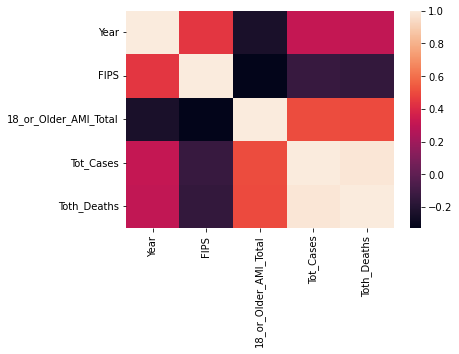

In [30]:
sns.heatmap(corr)

In [31]:
covid_ami = ml_alg[['18_or_Older_AMI_Total', 'Tot_Cases']].copy()
covid_ami.corr()

,18_or_Older_AMI_Total,Tot_Cases
18_or_Older_AMI_Total,1.000000,0.502972
Tot_Cases,0.502972,1.000000


In [33]:
# select features 
X = ml_alg.drop(['18_or_Older_AMI_Total'], axis = 1)
y = ml_alg[["18_or_Older_AMI_Total"]]

In [34]:
X.shape

(1517, 4)

In [35]:
y.shape

(1517, 1)

In [36]:
X_train = X[:175].values
X_test = X[175:].values
y_train = y[:175].values
y_test = y[175:].values

In [37]:
X_test

array([[  2020,     26, 589728,  13816],
       [  2020,     27, 415302,   5382],
       [  2020,     28, 221928,   5646],
       ...,
       [  2021,     56, 115638,   1526],
       [  2021,     56, 115638,   1526],
       [  2021,     56, 115638,   1526]])

In [38]:
y_test

array([[1469000],
       [ 819000],
       [ 431000],
       ...,
       [  98000],
       [  98000],
       [  98000]])

In [39]:
# create a Linear Regression model object
regression_model_df2 = LinearRegression()

In [40]:
X_test

array([[  2020,     26, 589728,  13816],
       [  2020,     27, 415302,   5382],
       [  2020,     28, 221928,   5646],
       ...,
       [  2021,     56, 115638,   1526],
       [  2021,     56, 115638,   1526],
       [  2021,     56, 115638,   1526]])

In [41]:
# pass through the X_train & y_train data set
regression_model_df2.fit(X_train, y_train)

LinearRegression()

In [42]:
# Grab the coefficient of our model and the intercept
intercept = regression_model_df2.intercept_[0]
coefficent = regression_model_df2.coef_[0][0]
intercept
coefficent

-106159.47223192267

In [43]:
# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model_df2.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The Coefficient for Year is -1.1e+05
The Coefficient for FIPS is 1.7e+03
The Coefficient for Tot_Cases is 3.1
The Coefficient for Toth_Deaths is -9.3e+01


In [44]:
# Get multiple predictions
y_predict = regression_model_df2.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[1158960.13813573],
       [1400106.94094646],
       [ 775498.40942949],
       [1373428.42889798],
       [ 776584.06009257]])

In [45]:
regression_model_df2.score(X_train, y_train)

0.15978263773653623

In [46]:

r2_score_df2 = r2_score(y_test, y_predict)
r2_score_df2

-0.2577420826097536

## Multiple Linear Regression

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)

In [48]:
model = LinearRegression()

In [49]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model.fit(X_train, y_train)
# YOUR CODE HERE
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4706779420589029
Testing Score: 0.2805931874054185


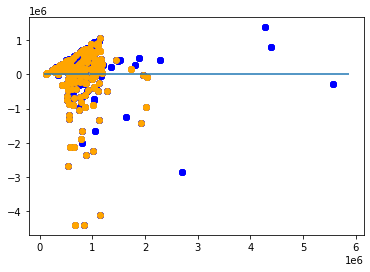

In [50]:
# Plot the residuals for the training and testing data.

# YOUR CODE HERE
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c = "b")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c = "orange")
plt.hlines(y = 0, xmin = y.min(), xmax = y.max())

In [51]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

NameError: name 'tree' is not defined